**Chapter 13**<br>
**ATMOS 5340: Environmental Programming and Statistics**<br>
<br>

<br>

> 

>  Objective<br>
> Projections <br>
> Plotting 2-d spherical surfaces on 2d planes<br>
> 
<br><br>
Before starting: Make sure that you open up a Jupyter notebook session using OnDemand so you can interactively follow along with today's lecture!
<br><br>



## Python: 2D Plotting with cartopy


In [12]:
import matplotlib.pyplot as plt
import numpy as np

# adding cartopy to handle projections
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature


In [13]:
# in the directory there are a couple of 2d data files used in the text as well
#one is 500 hPa geopotential height 'heights.npy'
# such fields help to define the overall structure and flow in the mid-troposphere
z = np.load('./heights.npy')

In [14]:
print(np.shape(z))
print(np.min(z),np.mean(z),np.max(z))

(101, 75)
5475.841476545013 5656.427301628287 5818.788996625898


So, a 2D numpy array with 101 rows and 75 columns. With values ranging between 5656.42 and 5818.78. Lets see what this data looks like visually using imshow, that just colors every value according to a colormap. See
https://matplotlib.org/stable/_images/sphx_glr_colormaps_002_2_0x.png

So, if this is 500 hPa heights where low values (blues) are in the north and high values (red) are in the south, then we need to switch
the x and y axes

That is upside down, so we need to put the origin in the lower left not the upper left. Think about it as if this is a "spreadsheet". 0 is in the upper left, but on the earth in the Northern Hemisphere, low latitudes are in the lower left

<class 'matplotlib.contour.QuadContourSet'>


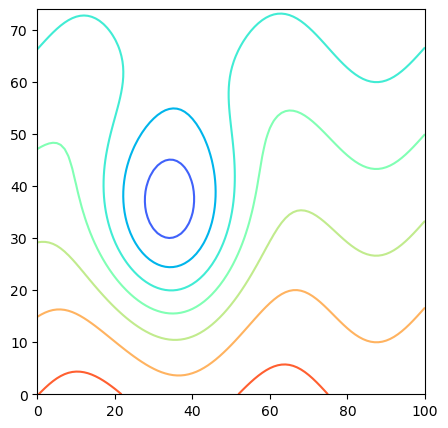

In [15]:
#transpose the data
z=np.transpose(z)
fig= plt.figure(figsize=(5,5))
ax = plt.gca()
#cs is now the contour object
cs=ax.contour(z,cmap='rainbow')
print(type(cs))
plt.savefig('plot_cartopy_1.png')

In [16]:
# assume the data are actually in lon,lat
#note we are using the transformed z 
lon = np.arange(0,z.shape[1])-160.  #1D array of lon values
lat = .5*np.arange(0,z.shape[0])+20.  #1D array of lat values
print(lon, lat)

[-160. -159. -158. -157. -156. -155. -154. -153. -152. -151. -150. -149.
 -148. -147. -146. -145. -144. -143. -142. -141. -140. -139. -138. -137.
 -136. -135. -134. -133. -132. -131. -130. -129. -128. -127. -126. -125.
 -124. -123. -122. -121. -120. -119. -118. -117. -116. -115. -114. -113.
 -112. -111. -110. -109. -108. -107. -106. -105. -104. -103. -102. -101.
 -100.  -99.  -98.  -97.  -96.  -95.  -94.  -93.  -92.  -91.  -90.  -89.
  -88.  -87.  -86.  -85.  -84.  -83.  -82.  -81.  -80.  -79.  -78.  -77.
  -76.  -75.  -74.  -73.  -72.  -71.  -70.  -69.  -68.  -67.  -66.  -65.
  -64.  -63.  -62.  -61.  -60.] [20.  20.5 21.  21.5 22.  22.5 23.  23.5 24.  24.5 25.  25.5 26.  26.5
 27.  27.5 28.  28.5 29.  29.5 30.  30.5 31.  31.5 32.  32.5 33.  33.5
 34.  34.5 35.  35.5 36.  36.5 37.  37.5 38.  38.5 39.  39.5 40.  40.5
 41.  41.5 42.  42.5 43.  43.5 44.  44.5 45.  45.5 46.  46.5 47.  47.5
 48.  48.5 49.  49.5 50.  50.5 51.  51.5 52.  52.5 53.  53.5 54.  54.5
 55.  55.5 56.  56.5 57. ]


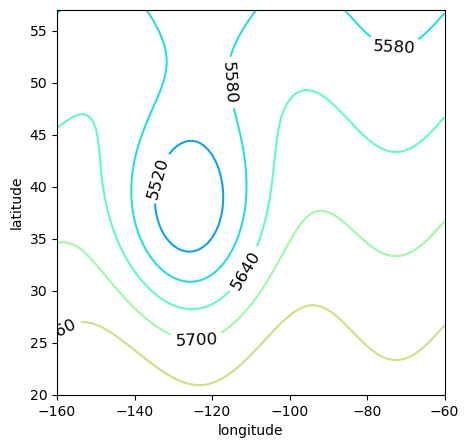

In [17]:
#Now  plot up the data again... add labels
#note that we are using the 1-D lon and Lat values
fig= plt.figure(figsize=(5,5))
ax = plt.gca()
cs=ax.contour(lon,lat,z,levels = range(5400,6000,60),linestyles='-',cmap='rainbow')
ax.clabel(cs,fmt='%.0f',inline=True,fontsize=12,colors='black')
ax.set(xlabel='longitude')
ax.set(ylabel='latitude')
plt.savefig('plot_cartopy_2.png')

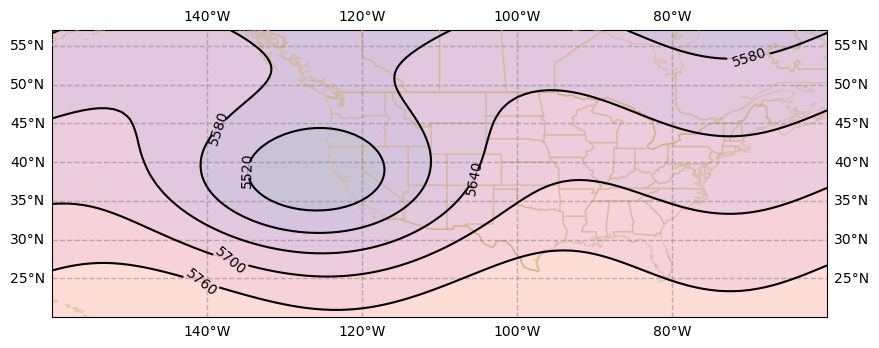

In [18]:
#PlateCarree is the most basic projection (equidistant in lat/lon google maps etc.)

proj = ccrs.PlateCarree()

#define state boundaries, don't shade the states (facecolor=none), and make them partially transparent (alpha=0.5)
states = cartopy.feature.NaturalEarthFeature(
            category='cultural', scale='50m', facecolor='none',alpha=.5,
            name='admin_1_states_provinces')
#note that the aspect ratio is controlled by the projection
fig= plt.figure(figsize=(10,10))
#use the projection to define the axes
ax = plt.axes(projection=proj)

#plot the contours
#really critical: transform=ccrs.PlateCarree specifies that the x,y coordinates are in lon,lat
#using a low zorder to have the fill underdeath and fill first
cf=ax.contourf(lon,lat,z,levels = range(5400,6000,60),cmap='magma',zorder=1,transform=ccrs.PlateCarree(),alpha=0.25)
#put the contours on top
cs=ax.contour(lon,lat,z,levels = range(5400,6000,60),linestyles='-',colors='k',transform=ccrs.PlateCarree(),zorder=10)
ax.clabel(cs,fmt='%.0f',inline=True,fontsize=10,colors='black',zorder=10)
#have the cartopy features above the fill but below the contours
ax.add_feature(states,zorder=5,edgecolor='tan',linewidth=1)
ax.add_feature(cartopy.feature.BORDERS,edgecolor='tan',linewidth=1,zorder=5)
ax.gridlines(draw_labels=True,linewidth=1, color='gray', alpha=0.5, linestyle='--',zorder=5)
plt.savefig('plot_cartopy_3.png')

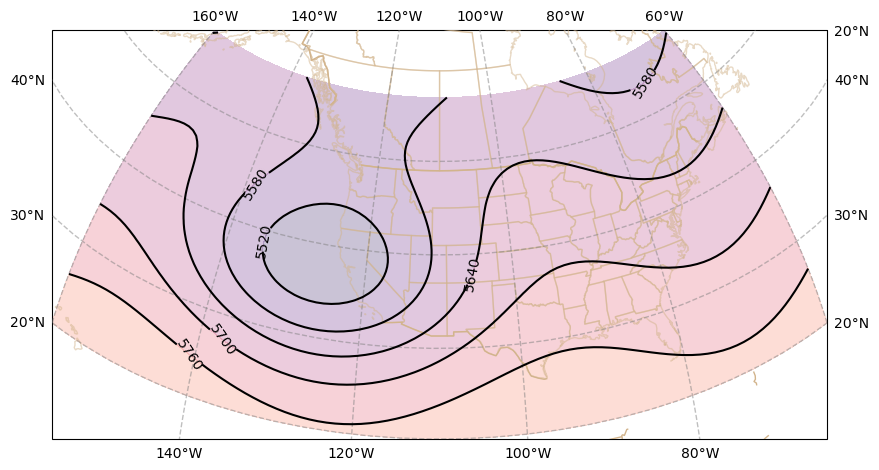

In [19]:
#PlateCarree is the most basic projection (equidistant in lat/lon google maps etc.)

proj = ccrs.Orthographic(central_longitude=-110,central_latitude=40)

#note that the aspect ratio is controlled by the projection
fig= plt.figure(figsize=(10,10))
#use the projection to define the axes
ax = plt.axes(projection=proj)

#plot the contours
#really critical: transform=ccrs.PlateCarree specifies that the x,y coordinates are in lon,lat
#using a low zorder to have the fill underdeath and fill first
cf=ax.contourf(lon,lat,z,levels = range(5400,6000,60),cmap='magma',zorder=1,transform=ccrs.PlateCarree(),alpha=0.25)
#put the contours on top
cs=ax.contour(lon,lat,z,levels = range(5400,6000,60),linestyles='-',colors='k',transform=ccrs.PlateCarree(),zorder=10)
ax.clabel(cs,fmt='%.0f',inline=True,fontsize=10,colors='black',zorder=10)
#have the cartopy features above the fill but below the contours
ax.add_feature(states,zorder=5,edgecolor='tan',linewidth=1)
ax.add_feature(cartopy.feature.BORDERS,edgecolor='tan',linewidth=1,zorder=5)
ax.gridlines(xlocs=range(-160,-40,20),ylocs=range(20,60,10),draw_labels=True,linewidth=1, \
             color='gray', alpha=0.5, linestyle='--',zorder=5)
plt.savefig('plot_cartopy_3.png')

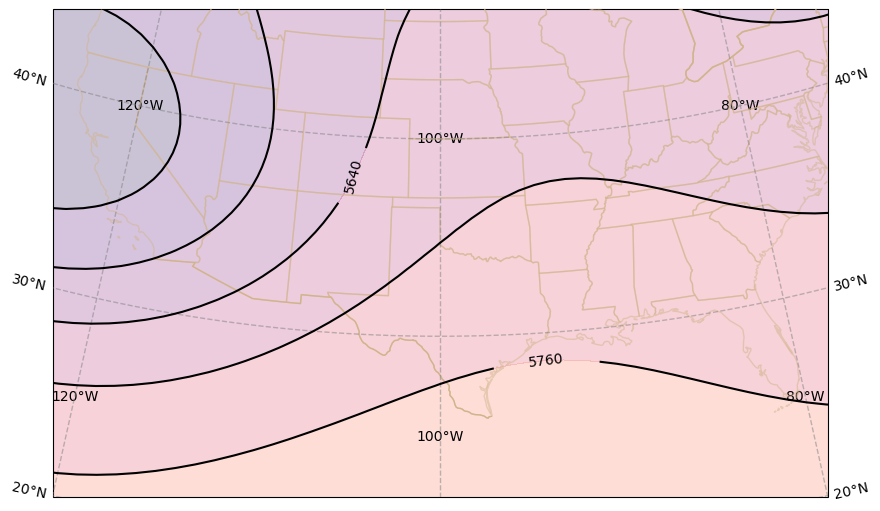

In [20]:
#Lambert conformal: common for regional model output

proj = ccrs.LambertConformal(central_longitude=-100, central_latitude=40)

#note that the aspect ratio is controlled by the projection
fig= plt.figure(figsize=(10,10))
#use the projection to define the axes
ax = plt.axes(projection=proj)

#plot the contours
#really critical: transform=ccrs.PlateCarree specifies that the x,y coordinates are in lon,lat
#using a low zorder to have the fill underdeath and fill first
cf=ax.contourf(lon,lat,z,levels = range(5400,6000,60),cmap='magma',zorder=1,transform=ccrs.PlateCarree(),alpha=0.25)
#put the contours on top
cs=ax.contour(lon,lat,z,levels = range(5400,6000,60),linestyles='-',colors='k',transform=ccrs.PlateCarree(),zorder=10)
ax.clabel(cs,fmt='%.0f',inline=True,fontsize=10,colors='black',zorder=10)
#have the cartopy features above the fill but below the contours
ax.add_feature(states,zorder=5,edgecolor='tan',linewidth=1)
ax.add_feature(cartopy.feature.BORDERS,edgecolor='tan',linewidth=1,zorder=5)
ax.gridlines(xlocs=range(-160,-40,20),ylocs=range(20,60,10),draw_labels=True,linewidth=1, \
             color='gray', alpha=0.5, linestyle='--',zorder=5)

#setting the extent, these are: left right, bottom top
ax.set_extent([-120,-80,20,45])
plt.savefig('plot_cartopy_4.png')

<br>

# Do it yourself! #2

Now that we've gone over a bunch of plotting options, go ahead and play around and come up with another example

<a list of 16 text.Text objects>

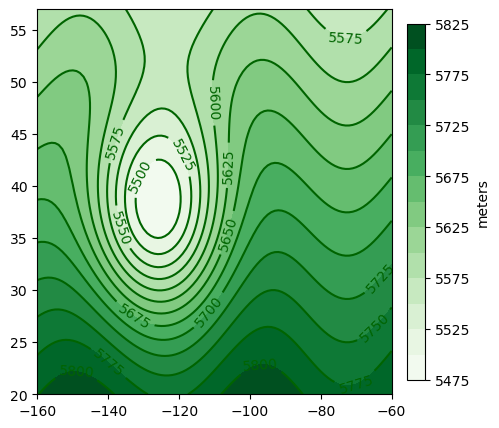

In [21]:
fig= plt.figure(figsize=(5,5))
ax = plt.gca()
cf = ax.contourf(lon,lat,z,15,cmap = 'Greens')
cl = ax.contour(lon,lat,z,15,colors='darkgreen')
cb=plt.colorbar(cf,fraction=0.046, pad=0.04)
cb.set_label('meters')
ax.clabel(cl,fmt='%.0f',inline=True)  

<br><br>

# Want more practice!?

Check out the following webpages:<br>
https://www.johnny-lin.com/pyintro/ed01/free_pdfs/ch09.pdf<br>
https://www.tutorialspoint.com/matplotlib/matplotlib_contour_plot.htm<br>
https://www.tutorialspoint.com/matplotlib/matplotlib_quiver_plot.htm<br>
https://pythonforundergradengineers.com/quiver-plot-with-matplotlib-and-jupyter-notebooks.html<br>
https://problemsolvingwithpython.com/06-Plotting-with-Matplotlib/06.15-Quiver-and-Stream-Plots/<br>
https://scitools.org.uk/cartopy/docs/v0.15/matplotlib/advanced_plotting.html<br>
https://uoftcoders.github.io/studyGroup/lessons/python/cartography/lesson/<br>
https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html<br>
    